In [2]:
import os

from diff_viz import msd
from diff_viz import diffusion_modes
from diff_viz import feature_distribution_plots
from diff_viz import data_loading
from diff_viz import diff_utils
import pandas as pd
from os import getcwd, chdir
#from diff_predictor import data_process
from diff_viz import diff_utils
import matplotlib.pyplot as plt
import numpy as np
#import diff_classifier
from diff_classifier.features import unmask_track
import altair as alt

from diff_viz.heatmaps import plot_heatmap, plot_scatterplot, plot_trajectories
from diff_viz.viscosity import viscosity_from_diffusion_coefficient

import panel as pn
import holoviews as hv
import pandas as pd
from holoviews.streams import Selection1D
from holoviews import opts

In [3]:
phuong_data_path = '/Users/nelsschimek/Documents/nancelab/diff_visualizer/diff_viz/tests/testing_data/phuong_data/Compiled_Trajectories/'

In [4]:
healthy_files_cortex = os.listdir(phuong_data_path + '/Healthy_QD-BEV/cortex/')
ogd_files_cortex = os.listdir(phuong_data_path + '/OGD_QD-BEV/cortex')
print(len(healthy_files_cortex))
print(len(ogd_files_cortex))

16
32


In [5]:
healthy_files_striatum = os.listdir(phuong_data_path + '/Healthy_QD-BEV/striatum/')
ogd_files_striatum = os.listdir(phuong_data_path + '/OGD_QD-BEV/striatum')
print(len(healthy_files_striatum))
print(len(ogd_files_striatum))

45
57


In [6]:
msd_healthy_cortex = [file for file in healthy_files_cortex if 'msd_10' in file and 'Blank' not in file]
msd_ogd_cortex = [file for file in ogd_files_cortex if 'msd_10' in file and 'Blank' not in file]
print(len(msd_healthy_cortex))
print(len(msd_ogd_cortex))

msd_healthy_striatum = [file for file in healthy_files_striatum if 'msd_10' in file and 'Blank' not in file]
msd_ogd_striatum = [file for file in ogd_files_striatum if 'msd_10' in file and 'Blank' not in file]
print(len(msd_healthy_striatum))
print(len(msd_ogd_striatum))

6
12
13
22


In [8]:
def get_traj_list(df):   

    output_df = pd.DataFrame()

    trackids = df.Track_ID.unique()
    partcount = trackids.shape[0]

    for particle in range(0, partcount):
        single_track_masked =\
            df.loc[df['Track_ID'] ==
                    trackids[particle]].sort_values(['Track_ID', 'Frame'],
                                                    ascending=[
                                                    1,
                                                    1]).reset_index(drop=True)
        #single_track = unmask_track(single_track_masked)
        single_track = single_track_masked
        # alph, coef = alpha_calc(single_track)
        # if (len(single_track) > 66) & (alph > 0):
        #     rc_short = (single_track['MSDs'][33] / 4 * 33) / (single_track['MSDs'][7] / 4*7)
        #     rc_long = (single_track['MSDs'][66] / 4 * 66) / (single_track['MSDs'][33] / 4*33)
        #     new_dict = {
        #         'X': single_track['X'],
        #         'Y': single_track['Y'],
        #         'alpha': alph,
        #         'rc_short': rc_short,
        #         'rc_long': rc_long
        #    }
        if output_df.empty:
            output_df = single_track
        else:
            output_df = pd.concat([output_df, single_track])
    return output_df

In [9]:
output = get_traj_list(pd.read_csv(phuong_data_path + '/OGD_QD-BEV/cortex/' + msd_ogd_cortex[0]))

In [21]:
def create_plot(df, start_frame=0, end_frame=651, color_by='Track_ID'):
    # Initialize an empty list to hold our paths
    paths = []
    
    # Filter the DataFrame to only include the desired frames
    # Assuming 'Frame' is a column in your DataFrame that indicates the frame number
    df_filtered = df[(df['Frame'] >= start_frame) & (df['Frame'] <= end_frame)]

    # Iterate over each unique track ID
    for track_id in df_filtered[color_by].unique():
        # Extract the data for the current track ID
        track_data = df_filtered[df_filtered[color_by] == track_id]
        
        # Create a path for the current track ID
        # Paths require a list of (x, y) tuples
        path = hv.Path([(track_data['X'], track_data['Y'])], label=str(track_id))
        
        # Append the path to our list of paths
        paths.append(path)
    
    # Combine all the paths into an Overlay, which is the correct container for multiple elements
    overlay = hv.Overlay(paths).opts(
        width=600, height=400, xlabel='X', ylabel='Y',
        legend_position='right', tools=['hover', 'lasso_select', 'box_select']
    )

    return overlay

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
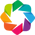

:Overlay
   .Path.A_0_full_stop_0   :Path   [x,y]
   .Path.A_1_full_stop_0   :Path   [x,y]
   .Path.A_2_full_stop_0   :Path   [x,y]
   .Path.A_3_full_stop_0   :Path   [x,y]
   .Path.A_4_full_stop_0   :Path   [x,y]
   .Path.A_5_full_stop_0   :Path   [x,y]
   .Path.A_6_full_stop_0   :Path   [x,y]
   .Path.A_7_full_stop_0   :Path   [x,y]
   .Path.A_8_full_stop_0   :Path   [x,y]
   .Path.A_9_full_stop_0   :Path   [x,y]
   .Path.A_10_full_stop_0  :Path   [x,y]
   .Path.A_11_full_stop_0  :Path   [x,y]
   .Path.A_12_full_stop_0  :Path   [x,y]
   .Path.A_13_full_stop_0  :Path   [x,y]
   .Path.A_14_full_stop_0  :Path   [x,y]
   .Path.A_15_full_stop_0  :Path   [x,y]
   .Path.A_16_full_stop_0  :Path   [x,y]
   .Path.A_17_full_stop_0  :Path   [x,y]
   .Path.A_18_full_stop_0  :Path   [x,y]
   .Path.A_19_full_stop_0  :Path   [x,y]
   .Path.A_20_full_stop_0  :Path   [x,y]
   .Path.A_21_full_stop_0  :Path   [x,y]
   .Path.A_22_full_stop_0  :Path   [x,y]
   .Path.A_23_full_stop_0  :Path   [x,y]
   .Path.A_24_full_stop_0  :Path   [x,y]
   .Path.A_25_full_stop_0  :Path   [x,y]
   .Path.A_26_full_stop_0  :Path   [x,y]
   .Path.A_27_full_stop_0  :Path   [x,y]
   .Path.A_28_full_stop_0  :Path   [x,y]
   .Path.A_29_full_stop_0  :Path   [x,y]
   .Path.A_30_full_stop_0  :Path   [x,y]
   .Path.A_31_full_stop_0  :Path   [x,y]
   .Path.A_32_full_stop_0  :Path   [x,y]
   .Path.A_33_full_stop_0  :Path   [x,y]
   .Path.A_34_full_stop_0  :Path   [x,y]
   .Path.A_35_full_stop_0  :Path   [x,y]
   .Path.A_36_full_stop_0  :Path   [x,y]
   .Path.A_37_full_stop_0  :Path   [x,y]
   .Path.A_38_full_stop_0  :Path   [x,y]
   .Path.A_39_full_stop_0  :Path   [x,y]
   .Path.A_40_full_stop_0  :Path   [x,y]
   .Path.A_41_full_stop_0  :Path   [x,y]
   .Path.A_42_full_stop_0  :Path   [x,y]
   .Path.A_43_full_stop_0  :Path   [x,y]
   .Path.A_44_full_stop_0  :Path   [x,y]
   .Path.A_45_full_stop_0  :Path   [x,y]
   .Path.A_46_full_stop_0  :Path   [x,y]
   .Path.A_47_full_stop_0  :Path   [x,y]
   .Path.A_48_full_stop_0  :Path   [x,y]
   .Path.A_49_full_stop_0  :Path   [x,y]
   .Path.A_50_full_stop_0  :Path   [x,y]
   .Path.A_51_full_stop_0  :Path   [x,y]
   .Path.A_52_full_stop_0  :Path   [x,y]
   .Path.A_53_full_stop_0  :Path   [x,y]
   .Path.A_54_full_stop_0  :Path   [x,y]
   .Path.A_55_full_stop_0  :Path   [x,y]
   .Path.A_56_full_stop_0  :Path   [x,y]
   .Path.A_57_full_stop_0  :Path   [x,y]
   .Path.A_58_full_stop_0  :Path   [x,y]
   .Path.A_59_full_stop_0  :Path   [x,y]
   .Path.A_60_full_stop_0  :Path   [x,y]
   .Path.A_61_full_stop_0  :Path   [x,y]
   .Path.A_62_full_stop_0  :Path   [x,y]
   .Path.A_63_full_stop_0  :Path   [x,y]
   .Path.A_64_full_stop_0  :Path   [x,y]
   .Path.A_65_full_stop_0  :Path   [x,y]
   .Path.A_66_full_stop_0  :Path   [x,y]
   .Path.A_67_full_stop_0  :Path   [x,y]
   .Path.A_68_full_stop_0  :Path   [x,y]
   .Path.A_69_full_stop_0  :Path   [x,y]
   .Path.A_70_full_stop_0  :Path   [x,y]
   .Path.A_71_full_stop_0  :Path   [x,y]
   .Path.A_72_full_stop_0  :Path   [x,y]
   .Path.A_73_full_stop_0  :Path   [x,y]
   .Path.A_74_full_stop_0  :Path   [x,y]
   .Path.A_75_full_stop_0  :Path   [x,y]
   .Path.A_76_full_stop_0  :Path   [x,y]
   .Path.A_77_full_stop_0  :Path   [x,y]
   .Path.A_78_full_stop_0  :Path   [x,y]
   .Path.A_79_full_stop_0  :Path   [x,y]
   .Path.A_80_full_stop_0  :Path   [x,y]
   .Path.A_81_full_stop_0  :Path   [x,y]
   .Path.A_82_full_stop_0  :Path   [x,y]
   .Path.A_83_full_stop_0  :Path   [x,y]
   .Path.A_84_full_stop_0  :Path   [x,y]
   .Path.A_85_full_stop_0  :Path   [x,y]
   .Path.A_86_full_stop_0  :Path   [x,y]
   .Path.A_87_full_stop_0  :Path   [x,y]
   .Path.A_88_full_stop_0  :Path   [x,y]
   .Path.A_89_full_stop_0  :Path   [x,y]
   .Path.A_90_full_stop_0  :Path   [x,y]
   .Path.A_91_full_stop_0  :Path   [x,y]
   .Path.A_92_full_stop_0  :Path   [x,y]
   .Path.A_93_full_stop_0  :Path   [x,y]
   .Path.A_94_full_stop_0  :Path   [x,y]
   .Path.A_95_full_stop_0  :Path   [x,y]
   .Path.A_96_full_stop_0  :Path   [x,y]
   .Path.A_97_

In [18]:
hv.extension('bokeh')
plot = create_plot(output)
display(plot)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
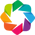

BokehModel(combine_events=True, render_bundle={'docs_json': {'8225a1e8-e4f3-43ea-b825-4626454551d0': {'version…

In [22]:


# Ensure HoloViews is using the Bokeh backend
hv.extension('bokeh')
# Activate Panel extensions (may not be necessary but included for completeness)
pn.extension()

# Replace 'spiked_data.csv' with the path to your dataset
df = output

# Function to create the plot

# Initial plot
plot = create_plot(df)

# Add a selection stream to capture selected points
selection = Selection1D(source=plot)

# Function to remove selected points and update the plot
def rm_sel(event):
    global df  # Reference the global DataFrame
    selected_indices = selection.index
    if selected_indices:
        df = df.drop(index=selected_indices).reset_index(drop=True)  # Remove selected points and reset index
        plot.event(data=df)  # Update the plot with the new data

# Button to remove selected points
remove_bt = pn.widgets.Button(name='Remove selected')
remove_bt.on_click(rm_sel)

# Function to save the updated DataFrame
def save_updated_df(event):
    # Specify the path and name for the updated DataFrame
    save_path = 'updated_data.csv'
    df.to_csv(save_path, index=False)
    print(f"DataFrame saved to {save_path}")

# Create a save button
save_bt = pn.widgets.Button(name='Save Updated DataFrame')
save_bt.on_click(save_updated_df)

# Assemble the application layout
app = pn.Column(plot, 'Click to delete the selected points', remove_bt, save_bt)

# Display the app
app.servable()
